Results on the SPICE dataset.

In [1]:
import matplotlib.pyplot as plt
import json

In [2]:
with open("results/logs/spice_full/E_spice.json", "r") as f:
    from_scratch_dict = json.load(f)

with open("results/logs/spice_full/E_fr_spice_pretr.json", "r") as f:
    pretr_dict = json.load(f)

In [3]:
from_scratch_errors = from_scratch_dict['E_spice']['val_energyRMSE']
pretr_errors = pretr_dict['E_fr_spice_pretr']['val_energyRMSE']

best_from_scratch = min(from_scratch_errors)
best_pretr = min(pretr_errors)

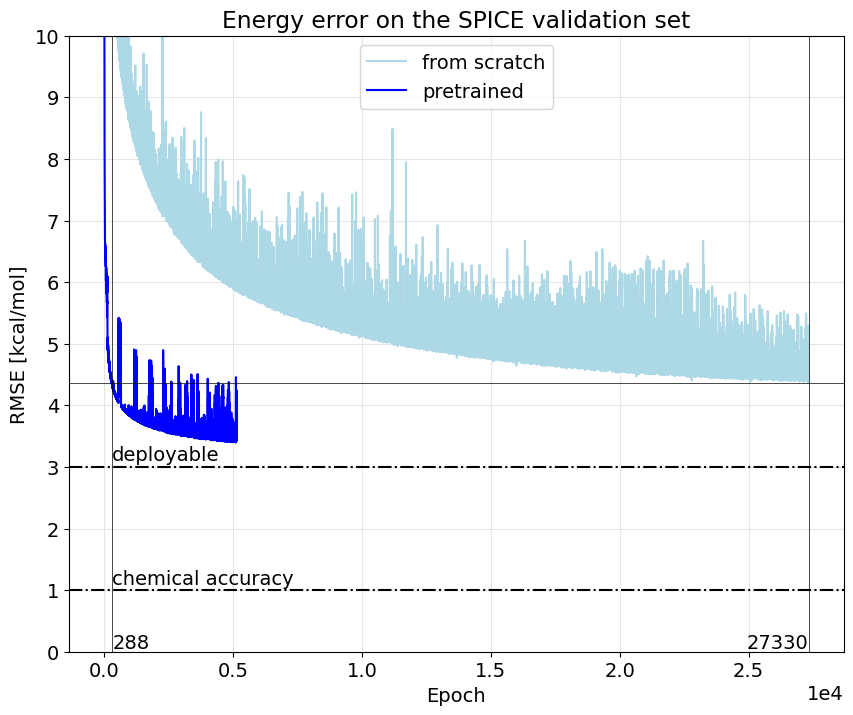

In [8]:
plt.rc('font', size=14)
# plt.rc('font', size=24)

plt.plot(from_scratch_errors, label='from scratch', color='lightblue')
plt.plot(pretr_errors, label='pretrained', color='blue')

plt.legend()
plt.ylim(0., 10.)
plt.xlabel('Epoch')

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ylabel('RMSE [kcal/mol]')
plt.title('Energy error on the SPICE validation set')

for i, e in enumerate(pretr_errors):
    if e < best_from_scratch:
        break

plt.axvline(x=i, color='black', linestyle='-', linewidth=0.5)

plt.text(i+30, 0.05, str(i), color = 'black')

for j, e in enumerate(from_scratch_errors):
    if e < best_from_scratch:
        break
plt.axvline(x=j, color='black', linestyle='-', linewidth=0.5)
plt.text(j-2400, 0.05, str(j), color = 'black')

plt.axhline(y=1, color='black', linestyle='-.')
plt.text(i+30, 1.1, 'chemical accuracy', color = 'black')

plt.axhline(y=3, color='black', linestyle='-.')
plt.text(i+30, 3.1, 'deployable', color = 'black')

plt.axhline(y=best_from_scratch, color='black', linestyle='-', linewidth=0.5)

plt.yticks(range(11))
plt.grid(color='0.9')

fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.savefig("results/spice_results.png", dpi=300)

In [5]:
print(f"best from scratch: {best_from_scratch:.2f} kcal/mol")
print(f"best pretr: {best_pretr:.2f} kcal/mol")

best from scratch: 4.37 kcal/mol
best pretr: 3.40 kcal/mol
